In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/Semester 7/Machine Learning/File Praktikum/Data Kelompok

/content/drive/MyDrive/Semester 7/Machine Learning/File Praktikum/Data Kelompok


# Main

In [ ]:
x_train = np.load("Copy of xtrain64.npy")
x_test = np.load("Copy of xval64.npy")
y_train = np.load("Copy of ytrain64.npy")
y_test = np.load("Copy of yval64.npy")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPool2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Activation

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[120,120,1]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 120, 120, 16)      160       
_________________________________________________________________
average_pooling2d_2 (Average (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
average_pooling2d_3 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)       

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
H = model.fit(x_train,y_train, batch_size=32, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
22/22 [==============================] - 9s 371ms/step - loss: 0.6957 - acc: 0.5044 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/100
22/22 [==============================] - 8s 359ms/step - loss: 0.6946 - acc: 0.5029 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/100
22/22 [==============================] - 8s 358ms/step - loss: 0.6927 - acc: 0.5264 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/100
22/22 [==============================] - 8s 360ms/step - loss: 0.6918 - acc: 0.5176 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 5/100
22/22 [==============================] - 8s 359ms/step - loss: 0.6905 - acc: 0.5411 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/100
22/22 [==============================] - 8s 360ms/step - loss: 0.6948 - acc: 0.5015 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 7/100
22/22 [==============================] - 8s 361ms/step - loss: 0.6899 - acc: 0.5367 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 8/100
22/22 [==============================] - 8s 362ms/step - 

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

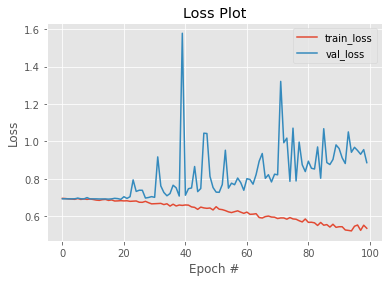

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

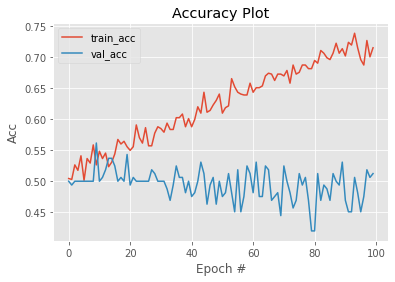

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.53        81
         1.0       0.51      0.48      0.50        81

    accuracy                           0.51       162
   macro avg       0.51      0.51      0.51       162
weighted avg       0.51      0.51      0.51       162



In [18]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk
